In [1]:
import torch
import torch.nn as nn

device = "cpu"
if torch.cuda.is_available():
    device = "cuda"
    print("GPU Available")

GPU Available


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import json
import os
from PIL import Image
from skimage.transform import resize
import random
from sklearn.model_selection import train_test_split
%matplotlib inline



In [3]:
base_dir = '/home/ashishr/my_project_github_check/Data/CARVANA'
images_dir = f'{base_dir}/imgs'
masks_dir = f'{base_dir}/masks'

In [4]:
images_listdir = os.listdir(images_dir)[0:20]
random_images = np.random.choice(images_listdir, size = 9, replace = False)


In [5]:
image_size=512
input_image_size=(512,512)

In [6]:
def read_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (image_size, image_size))
    return img

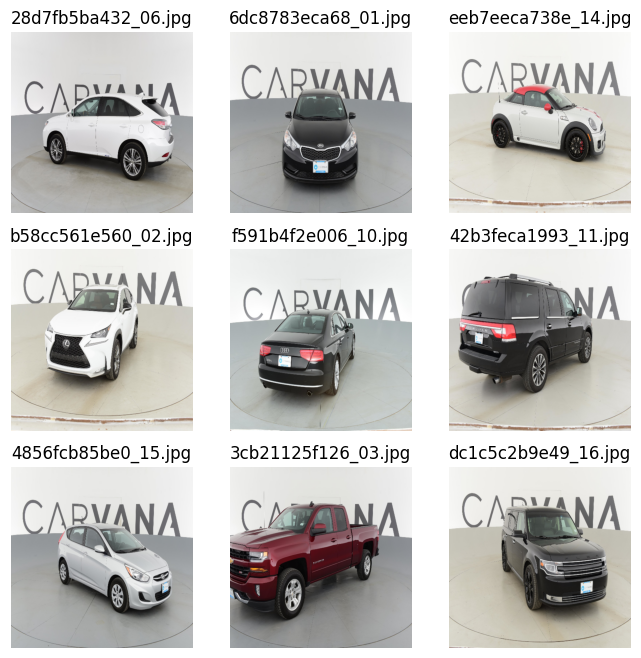

In [7]:
rows = 3
cols = 3
fig, ax = plt.subplots(rows, cols, figsize = (8,8))
for i, ax in enumerate(ax.flat):
    if i < len(random_images):
        img = read_image(f"{images_dir}/{random_images[i]}")
        #print(img.shape)
        ax.set_title(f"{random_images[i]}")
        ax.imshow(img)
        ax.axis('off')

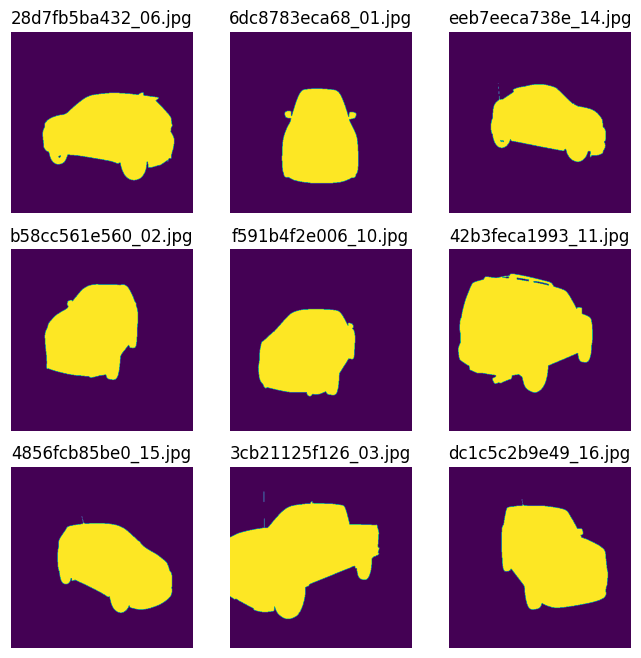

In [8]:
fig, ax = plt.subplots(rows, cols, figsize = (8,8))
for i, ax in enumerate(ax.flat):
    if i < len(random_images):
        file=random_images[i][0:-4]+'.png'
        img = read_image(f"{masks_dir}/{file}")
        #print(img.shape)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #print(img.shape)
        ax.set_title(f"{random_images[i]}")
        ax.imshow(img)
        ax.axis('off')

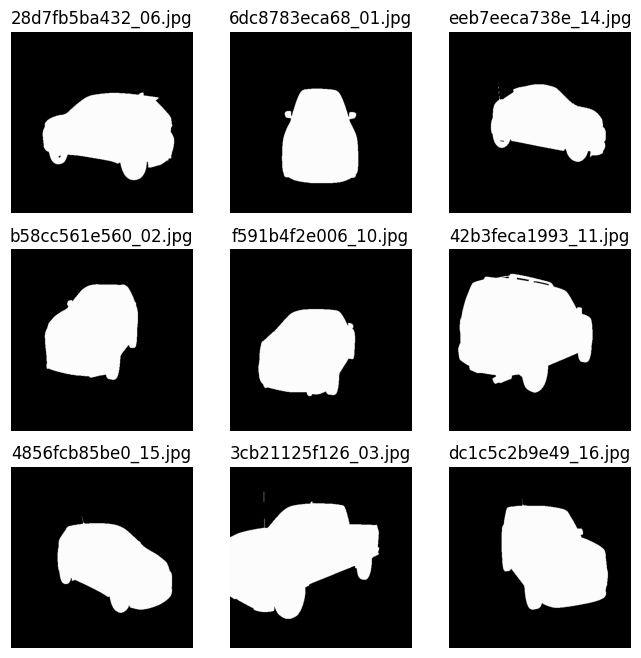

In [9]:
fig, ax = plt.subplots(rows, cols, figsize = (8,8))
for i, ax in enumerate(ax.flat):
    if i < len(random_images):
        file=random_images[i][0:-4]+'.png'
        img = read_image(f"{masks_dir}/{file}")
        #print(img.shape)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)*0.99
        #print(set(img.flatten()))
        ax.set_title(f"{random_images[i]}")
        ax.imshow(img)
        ax.axis('off')

In [10]:
!python -m torch.distributed.launch --nproc_per_node=3 --use_env testing/pruning_unet_distributed.py ../Data/CARVANA --dataset CARVANA --arch UNet --save_path output_unet_metric --rate_norm 1 --rate_dist 0.2 --lr 0.001 --epochs 1



*****************************************
Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
*****************************************
save path : output_unet_metric
{'arch': 'UNet', 'batch_size': 3, 'cuda': True, 'data_path': '../Data/CARVANA', 'dataset': 'CARVANA', 'depth': 16, 'dist_type': 'l2', 'epoch_prune': 1, 'epochs': 1, 'evaluate': False, 'layer_begin': 1, 'layer_end': 1, 'layer_inter': 1, 'log_interval': 100, 'lr': 0.001, 'momentum': 0.9, 'no_cuda': False, 'num_gpus': 1, 'pretrain_path': '', 'rate_dist': 0.2, 'rate_norm': 1.0, 'resume': '', 'save_path': 'output_unet_metric', 'seed': 1, 'start_epoch': 0, 'test_batch_size': 32, 'use_precfg': False, 'use_pretrain': False, 'use_state_dict': False, 'weight_decay': 0.0001}
Random Seed: 1
python version : 3.8.3 (default, Jul  2 2020, 16:21:59)  [GCC 7.3.0]
torch  version : 1.7

In [10]:
!python -m torch.distributed.launch --nproc_per_node=3 --use_env pruning_unet_distributed_metric.py ../Data/CARVANA --dataset CARVANA --arch UNet --batch_size 6 --output_dir output_unet_batch1 --rate_norm 1 --rate_dist 0.2 --lr 0.001 --epochs 1



*****************************************
Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
*****************************************
save path : output_unet_batch1
{'arch': 'UNet', 'batch_size': 6, 'cuda': True, 'data_path': '../Data/CARVANA', 'dataset': 'CARVANA', 'depth': 16, 'dist_type': 'l2', 'epoch_prune': 1, 'epochs': 1, 'evaluate': False, 'layer_begin': 1, 'layer_end': 1, 'layer_inter': 1, 'log_interval': 100, 'lr': 0.001, 'momentum': 0.9, 'no_cuda': False, 'num_gpus': 1, 'output_dir': 'output_unet_batch1', 'pretrain_path': '', 'rate_dist': 0.2, 'rate_norm': 1.0, 'resume': '', 'save_path': 'output_unet_batch1', 'seed': 1, 'start_epoch': 0, 'test_batch_size': 32, 'use_precfg': False, 'use_pretrain': False, 'use_state_dict': False, 'weight_decay': 0.0001}
save path : output_unet_batch1
Random Seed: 1
python version : 3.8.3

In [23]:
!python -m torch.distributed.launch --nproc_per_node=3 --use_env testing/pruning_unet_distributed_metric.py ../Data/CARVANA --dataset CARVANA --arch UNet --output_dir output_unet_metric_dir --rate_norm 1 --rate_dist 0.2 --lr 0.001 --epochs 1 --resume output_unet/model_best.pth.tar



*****************************************
Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
*****************************************
save path : output_unet_metric_dirsave path : output_unet_metric_dir

save path : output_unet_metric_dir
{'arch': 'UNet', 'batch_size': 3, 'cuda': True, 'data_path': '../Data/CARVANA', 'dataset': 'CARVANA', 'depth': 16, 'dist_type': 'l2', 'epoch_prune': 1, 'epochs': 1, 'evaluate': False, 'layer_begin': 1, 'layer_end': 1, 'layer_inter': 1, 'log_interval': 100, 'lr': 0.001, 'momentum': 0.9, 'no_cuda': False, 'num_gpus': 1, 'output_dir': 'output_unet_metric_dir', 'pretrain_path': '', 'rate_dist': 0.2, 'rate_norm': 1.0, 'resume': 'output_unet/model_best.pth.tar', 'save_path': 'output_unet_metric_dir', 'seed': 1, 'start_epoch': 0, 'test_batch_size': 32, 'use_precfg': False, 'use_pretrain': False, 'use_

In [20]:
import torch
import sys
sys.path.append("/home/ashishr/my_project_github_check/ModelCompression/testing")
import models

pruned_model = models.__dict__['UNet'](n_channels=3, n_classes=2)
pruned_model.load_state_dict(torch.load("./output_unet/model_best.pth.tar")['state_dict'])

# checkpoint = torch.load("./output_unet/model_best.pth.tar", map_location=device)
# mask_values = checkpoint.pop('mask_values', [0, 1])
# unpruned_model.load_state_dict(checkpoint)

# unpruned_model.load_state_dict(checkpoint['state_dict'])
pruned_model.to(device)

total = 0
print('Trainable parameters:')

for n, module in pruned_model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        for name, param in module.named_parameters():
            if param.requires_grad:
                print(name, '\t', param.numel())
                total += param.numel()
print()
print('Total', '\t', total)

Trainable parameters:
weight 	 1728
weight 	 36864
weight 	 73728
weight 	 147456
weight 	 294912
weight 	 589824
weight 	 1179648
weight 	 2359296
weight 	 4718592
weight 	 9437184
weight 	 4718592
weight 	 2359296
weight 	 1179648
weight 	 589824
weight 	 294912
weight 	 147456
weight 	 73728
weight 	 36864
weight 	 128
bias 	 2

Total 	 28239682


In [23]:
cfg = []
for layer in unpruned_model.modules():
    if isinstance(layer, nn.Conv2d):
        cfg.append(layer.out_channels)
    elif isinstance(layer, nn.MaxPool2d):
        cfg.append('M')
    elif isinstance(layer, nn.ConvTranspose2d):
        cfg.append(layer.out_channels) 
    elif isinstance(layer, nn.Linear):
        cfg.append(layer.out_features)

print("Model Configuration (cfg):", cfg)

Model Configuration (cfg): [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 1024, 1024, 512, 512, 512, 256, 256, 256, 128, 128, 128, 64, 64, 64, 2]


In [33]:
import time
def calculate_sparsity(module):
    """Calculate the sparsity of a module."""
    if hasattr(module, "weight"):
        total_weights = module.weight.nelement()
        zero_weights = torch.sum(module.weight == 0).item()
        sparsity = 100.0 * zero_weights / total_weights
        return sparsity
    return None


def show_sparsity(model):
    """Display the sparsity for the model."""
    print("Sparsity in the model:")
    for name, module in model.named_modules():
        sparsity = calculate_sparsity(module)
        if sparsity is not None:
            print(f"{name}: {sparsity:.2f}%")


def calculate_parameters_and_size(net):
    total_trainable = 0
    total_params = 0
    pruned_params = 0
    model_size = 0
    pruned_model_size = 0
    
    for name, param in net.named_parameters():
        param_size = param.numel() * param.element_size()
        model_size += param_size  # Calculate the size of each parameter
        total_params += param.numel()  # Count all parameters
        if param.requires_grad:
            total_trainable += param.numel()
    
    for name, module in net.named_modules():
        if hasattr(module, 'weight') and module.weight is not None:
            total_elements = module.weight.nelement()
            pruned_elements = torch.sum(module.weight == 0).item()
            pruned_params += pruned_elements
            pruned_model_size += (total_elements - pruned_elements) * module.weight.element_size()
        
        if hasattr(module, 'bias') and module.bias is not None:
            total_elements = module.bias.nelement()
            pruned_elements = torch.sum(module.bias == 0).item()
            pruned_params += pruned_elements
            pruned_model_size += (total_elements - pruned_elements) * module.bias.element_size()
    
    remaining_params = total_params - pruned_params
    
    model_size_MB = model_size / (1024 ** 2)
    pruned_model_size_MB = pruned_model_size / (1024 ** 2)
    
    return {
        'total_trainable': total_trainable,
        'pruned_params': pruned_params,
        'remaining_params': remaining_params,
        'model_size_MB': model_size_MB,
        'pruned_model_size_MB': pruned_model_size_MB
    }


def calculate_fps(net, input_shape, device='cpu', num_iterations=100):
    net.to(device)
    net.eval()
    total_time = 0.0

    for _ in range(num_iterations):
        input_data = torch.randn(*input_shape).to(device)
        start_time = time.time()
        with torch.no_grad():
            net(input_data)
        end_time = time.time()
        total_time += end_time - start_time

    avg_fps = num_iterations / total_time
    return avg_fps
metrics = calculate_parameters_and_size(pruned_model)
fps = calculate_fps(pruned_model, input_shape=(1, 3, 256, 256), device=device, num_iterations=100)
print(metrics)
print(fps)


{'total_trainable': 31037698, 'pruned_params': 6177433, 'remaining_params': 24860265, 'model_size_MB': 118.39942169189453, 'pruned_model_size_MB': 94.83438491821289}
337.4529539072997


# General function to test a model

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""

    def __init__(self, in_channels, out_channels, mid_channels=None):
        super().__init__()
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(mid_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)


class Down(nn.Module):
    """Downscaling with maxpool then double conv"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, out_channels)
        )

    def forward(self, x):
        return self.maxpool_conv(x)


class Up(nn.Module):
    """Upscaling then double conv"""

    def __init__(self, in_channels, out_channels, bilinear=True):
        super().__init__()

        # if bilinear, use the normal convolutions to reduce the number of channels
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.conv = DoubleConv(in_channels, out_channels, in_channels // 2)
        else:
            self.up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=2, stride=2)
            self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        return self.conv(x)


class UNet(nn.Module):
    def __init__(self, n_channels, n_classes, bilinear=False):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.bilinear = bilinear

        self.inc = DoubleConv(n_channels, 64)
        self.down1 = Down(64, 128)
        self.down2 = Down(128, 256)
        self.down3 = Down(256, 512)
        factor = 2 if bilinear else 1
        self.down4 = Down(512, 1024 // factor)
        self.up1 = Up(1024, 512 // factor, bilinear)
        self.up2 = Up(512, 256 // factor, bilinear)
        self.up3 = Up(256, 128 // factor, bilinear)
        self.up4 = Up(128, 64, bilinear)
        self.outc = OutConv(64, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.outc(x)
        return logits
    
    def use_checkpointing(self):
        self.inc = torch.utils.checkpoint(self.inc)
        self.down1 = torch.utils.checkpoint(self.down1)
        self.down2 = torch.utils.checkpoint(self.down2)
        self.down3 = torch.utils.checkpoint(self.down3)
        self.down4 = torch.utils.checkpoint(self.down4)
        self.up1 = torch.utils.checkpoint(self.up1)
        self.up2 = torch.utils.checkpoint(self.up2)
        self.up3 = torch.utils.checkpoint(self.up3)
        self.up4 = torch.utils.checkpoint(self.up4)
        self.outc = torch.utils.checkpoint(self.outc)


# Testing the accuracy of the unpruned model

# Loading the pruned (only zeroed out) model

In [23]:
import os
import torch
from torch.utils.data import DataLoader, Subset, random_split
from data_loading import CarvanaDataset, BasicDataset  # Ensure this file is in the correct directory
import numpy as np
import torch
import sys
sys.path.append("./testing")
import torch.nn.functional as F
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm
import numpy as np
from data_loading import CarvanaDataset, BasicDataset  # Assuming these are defined in data_loading.py
import models  # Assuming models are defined in models.py
from dice_score import multiclass_dice_coeff, dice_coeff  # Assuming these are defined in dice_score.py


def load_data(data_path, batch_size=1, val_percent=0.2):
    """
    Load the Carvana dataset with error handling.

    Parameters:
    - data_path: str, path to the dataset
    - batch_size: int, batch size for DataLoader
    - val_percent: float, percentage of data to use for validation

    Returns:
    - train_loader: DataLoader, DataLoader for the training set
    - val_loader: DataLoader, DataLoader for the validation set
    """

    try:
        dataset = CarvanaDataset(os.path.join(data_path, 'imgs'), os.path.join(data_path, 'masks'), scale=1)
    except (AssertionError, RuntimeError, IndexError):
        print("Switching to BasicDataset due to an error with CarvanaDataset.")
        dataset = BasicDataset(os.path.join(data_path, 'imgs'), os.path.join(data_path, 'masks'), scale=1)

    # Debug: print the first few items in the dataset
    print("Dataset loaded successfully. Sample items:")
    for i in range(3):
        print(f"Image {i}: {dataset[i]['image'].shape}, Mask {i}: {dataset[i]['mask'].shape}")

    # Limiting dataset to first 100 items for debugging purposes
    dataset = Subset(dataset, range(0, 100))

    # Splitting the dataset into training and validation sets
    n_val = int(len(dataset) * val_percent)
    n_train = len(dataset) - n_val
    train_set, val_set = random_split(dataset, [n_train, n_val], generator=torch.Generator().manual_seed(0))

    # Creating DataLoader for training and validation sets
    train_loader = DataLoader(train_set, batch_size=batch_size, num_workers=4, pin_memory=True, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=batch_size, num_workers=4, pin_memory=True, shuffle=False)

    return train_loader, val_loader

# Example usage
data_path = '../Data/CARVANA'
train_loader, val_loader = load_data(data_path)

# Printing to check if DataLoaders are working correctly
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(val_loader)}")


  0%|                                                                                                              | 0/100 [00:00<?, ?it/s]


Switching to BasicDataset due to an error with CarvanaDataset.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 538.55it/s]


Dataset loaded successfully. Sample items:
Image 0: torch.Size([3, 1280, 1918]), Mask 0: torch.Size([1280, 1918])
Image 1: torch.Size([3, 1280, 1918]), Mask 1: torch.Size([1280, 1918])
Image 2: torch.Size([3, 1280, 1918]), Mask 2: torch.Size([1280, 1918])
Number of training batches: 80
Number of validation batches: 20


In [13]:
# pruned_model = vgg().to(device)

pruned_model = UNet(n_channels=3, n_classes=2)

pruned_model.load_state_dict(torch.load("./output_unet/model_best.pth.tar")['state_dict'])

<All keys matched successfully>

  0%|                                                                                                              | 0/100 [00:00<?, ?it/s]


Switching to BasicDataset due to an error with CarvanaDataset.


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 571.39it/s]


Dataset loaded successfully. Sample items:
Image 0: torch.Size([3, 1280, 1918]), Mask 0: torch.Size([1280, 1918])
Image 1: torch.Size([3, 1280, 1918]), Mask 1: torch.Size([1280, 1918])
Image 2: torch.Size([3, 1280, 1918]), Mask 2: torch.Size([1280, 1918])


Validation round:   0%|                                                                                          | 0/20 [00:00<?, ?batch/s]

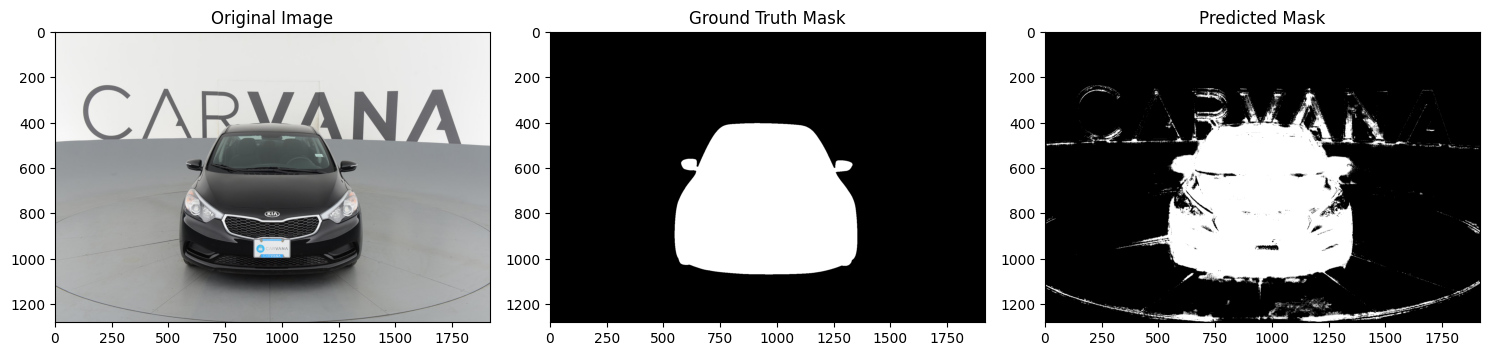

Validation round:   5%|████                                                                              | 1/20 [00:02<00:38,  2.02s/batch]

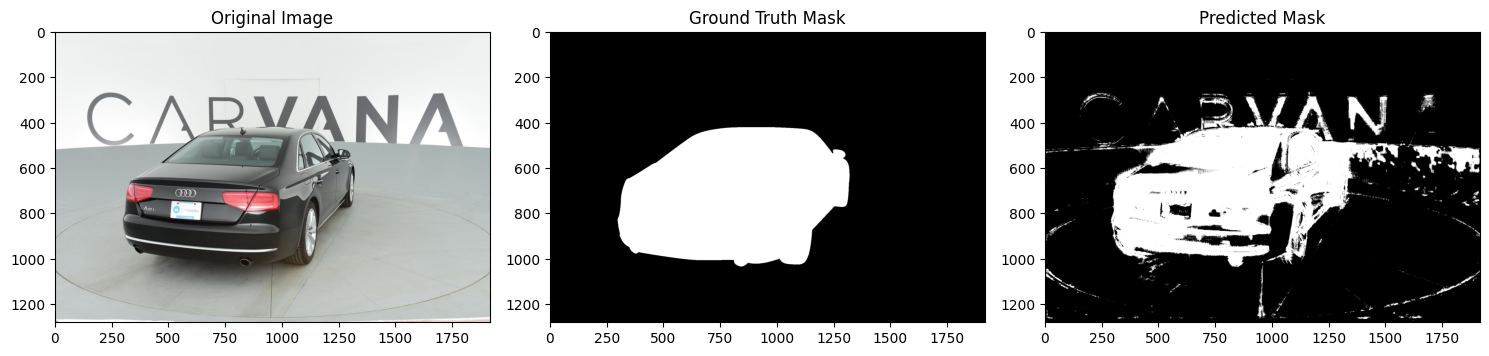

Validation round:  10%|████████▏                                                                         | 2/20 [00:03<00:28,  1.60s/batch]

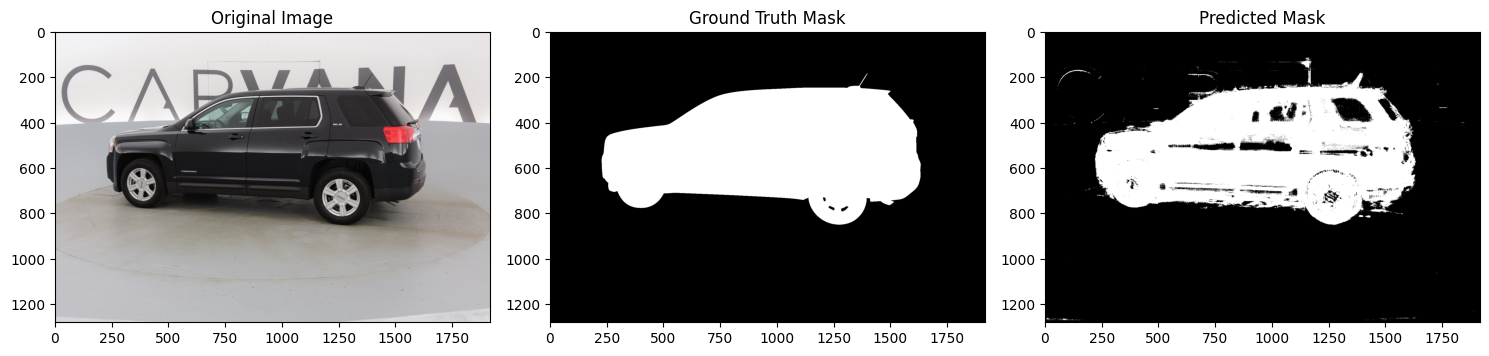

Validation round:  15%|████████████▎                                                                     | 3/20 [00:04<00:24,  1.46s/batch]

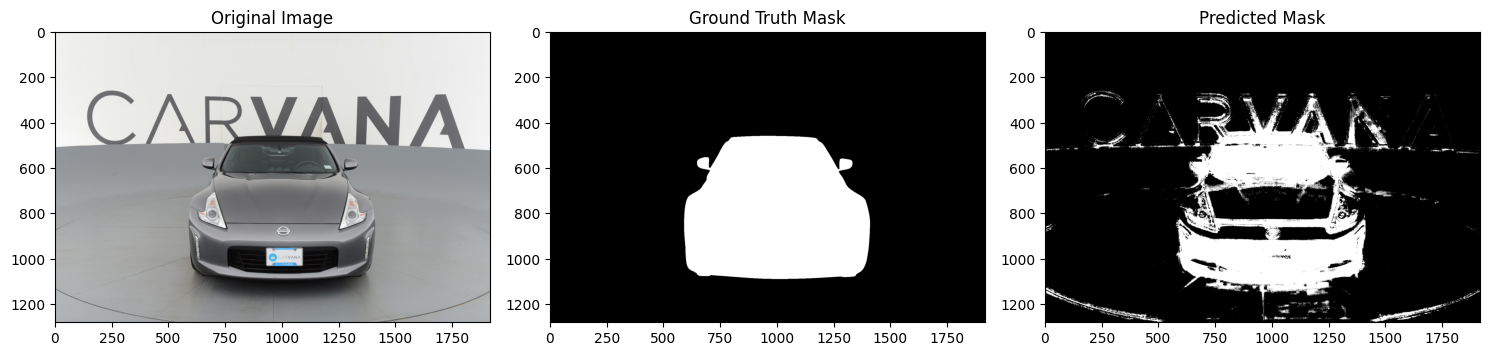

Validation round:  20%|████████████████▍                                                                 | 4/20 [00:05<00:22,  1.39s/batch]

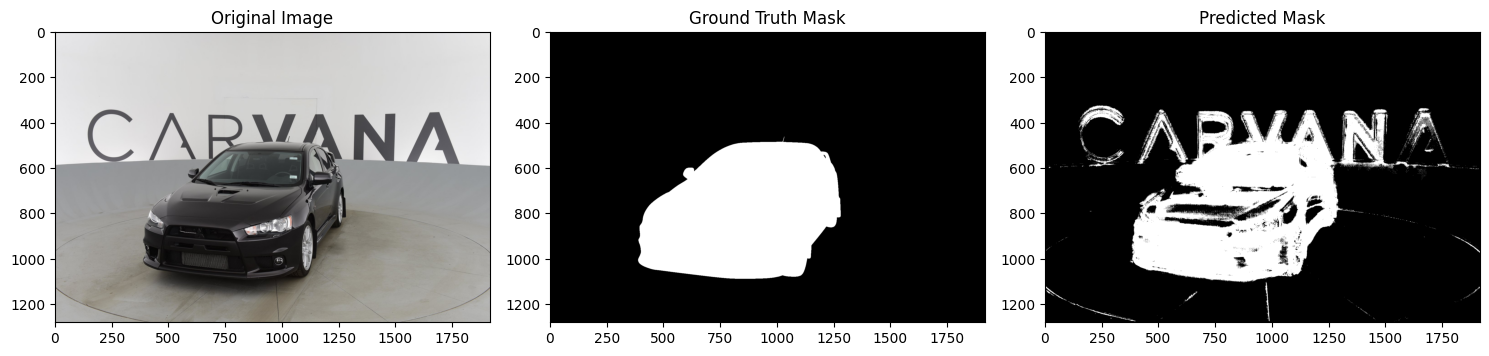

Validation round:  25%|████████████████████▌                                                             | 5/20 [00:07<00:20,  1.36s/batch]

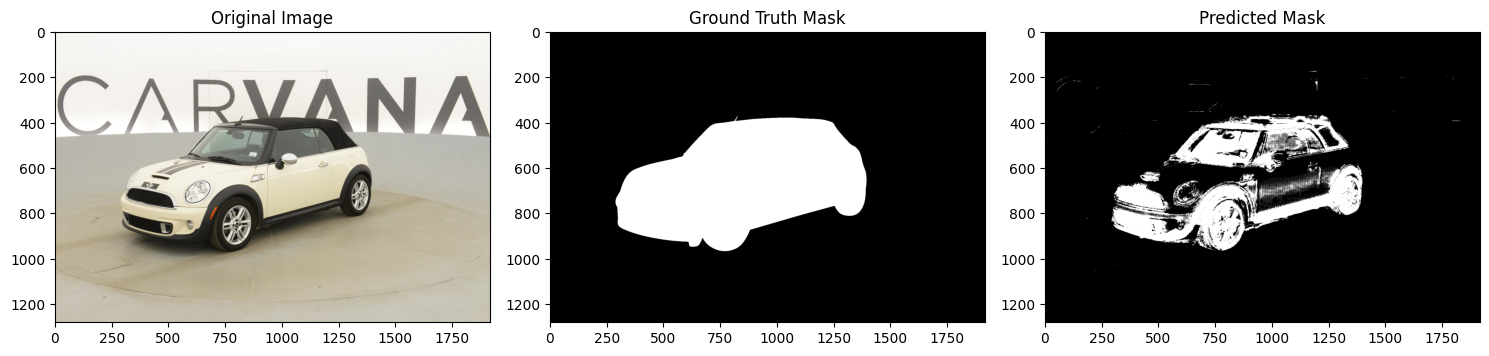

Validation round:  30%|████████████████████████▌                                                         | 6/20 [00:08<00:18,  1.34s/batch]

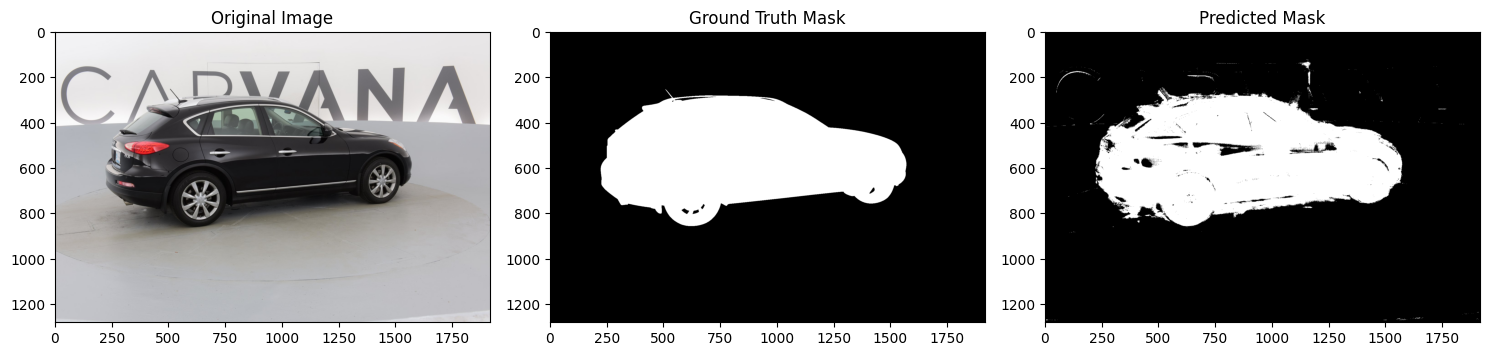

Validation round:  35%|████████████████████████████▋                                                     | 7/20 [00:09<00:17,  1.33s/batch]

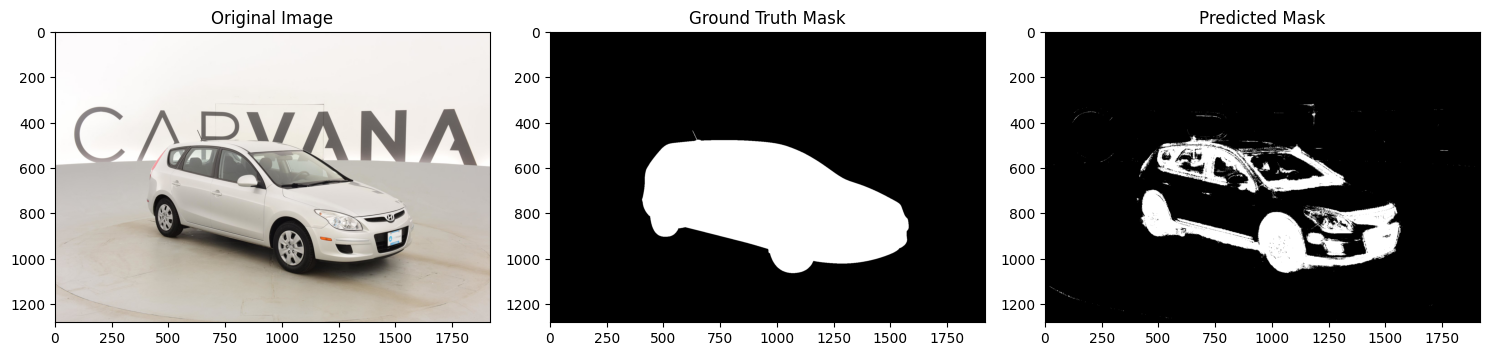

Validation round:  40%|████████████████████████████████▊                                                 | 8/20 [00:11<00:15,  1.32s/batch]

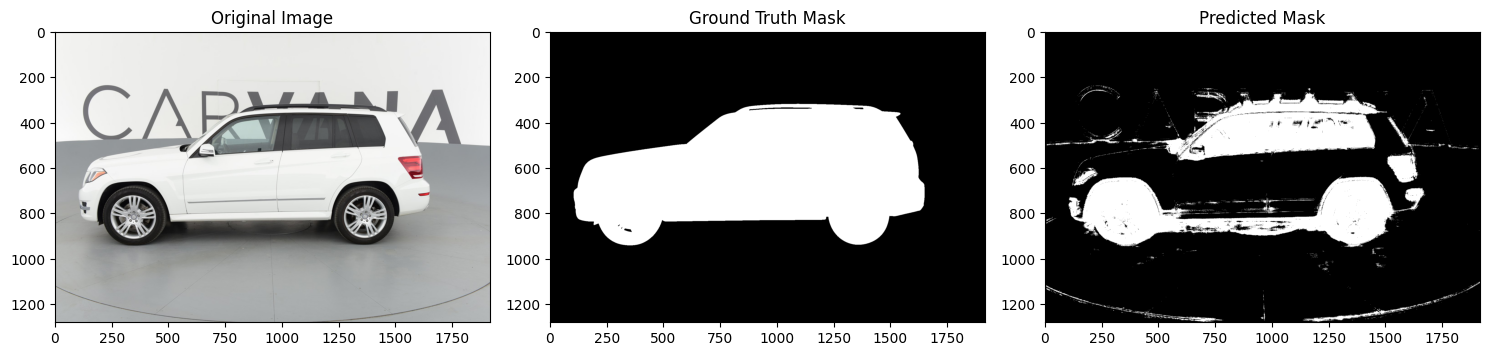

Validation round:  45%|████████████████████████████████████▉                                             | 9/20 [00:12<00:14,  1.31s/batch]

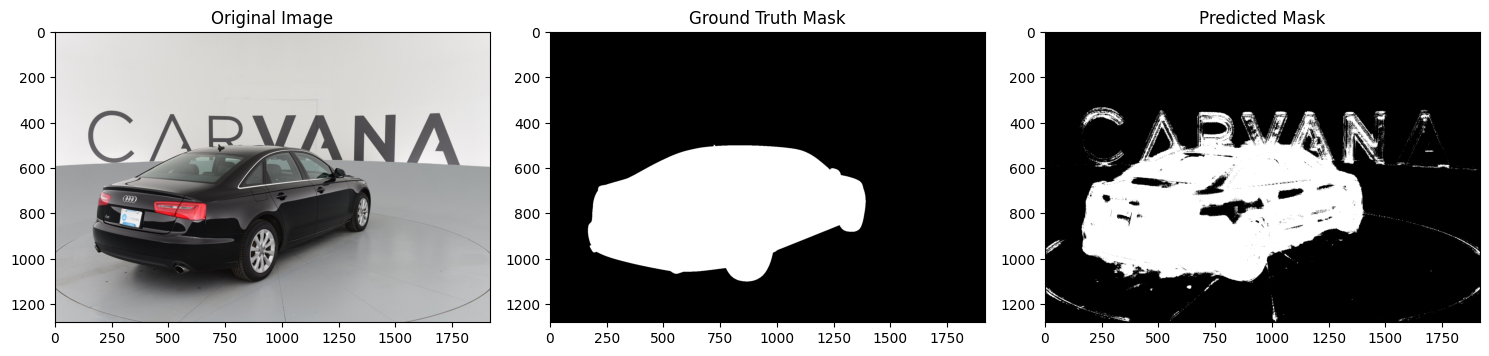

Validation round:  50%|████████████████████████████████████████▌                                        | 10/20 [00:14<00:14,  1.41s/batch]

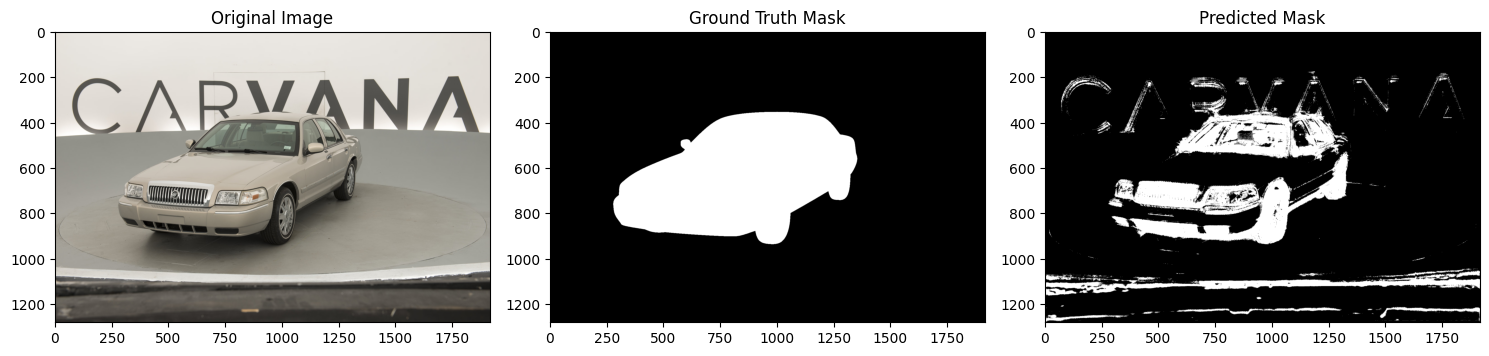

Validation round:  55%|████████████████████████████████████████████▌                                    | 11/20 [00:15<00:12,  1.37s/batch]

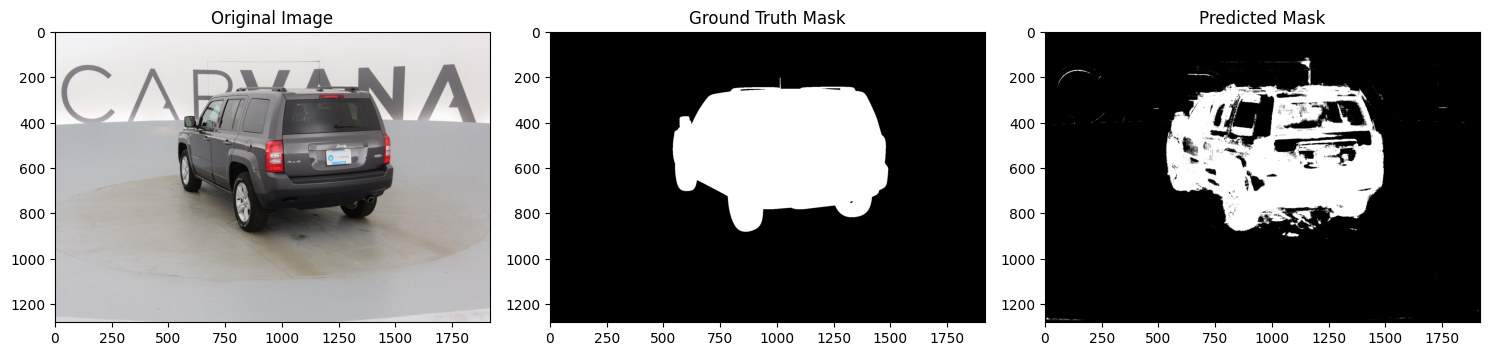

Validation round:  60%|████████████████████████████████████████████████▌                                | 12/20 [00:16<00:10,  1.34s/batch]

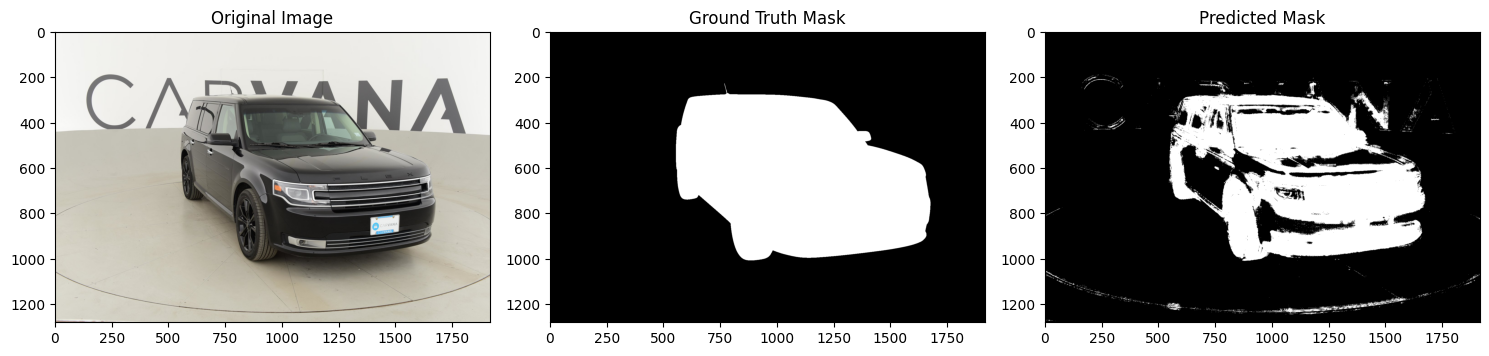

Validation round:  65%|████████████████████████████████████████████████████▋                            | 13/20 [00:17<00:09,  1.32s/batch]

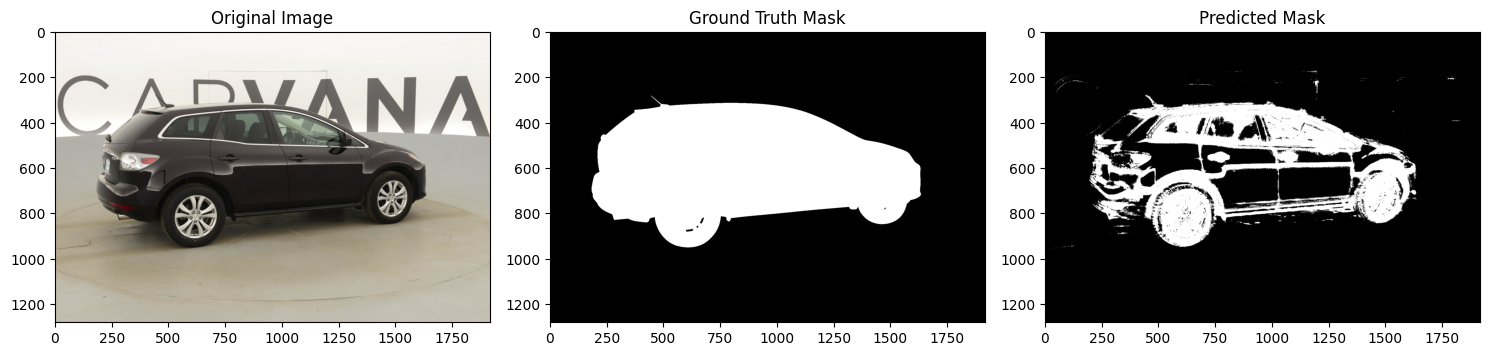

Validation round:  70%|████████████████████████████████████████████████████████▋                        | 14/20 [00:19<00:07,  1.31s/batch]

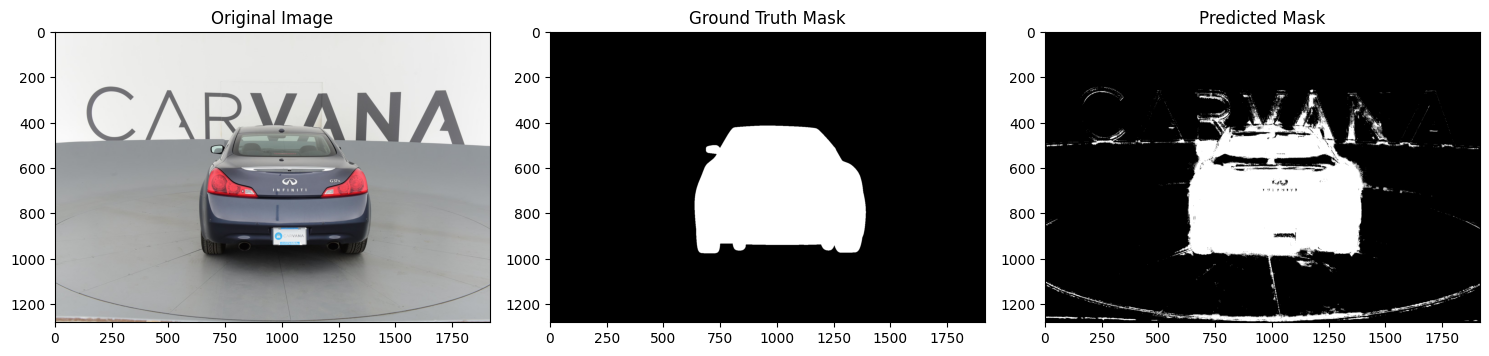

Validation round:  75%|████████████████████████████████████████████████████████████▊                    | 15/20 [00:20<00:06,  1.30s/batch]

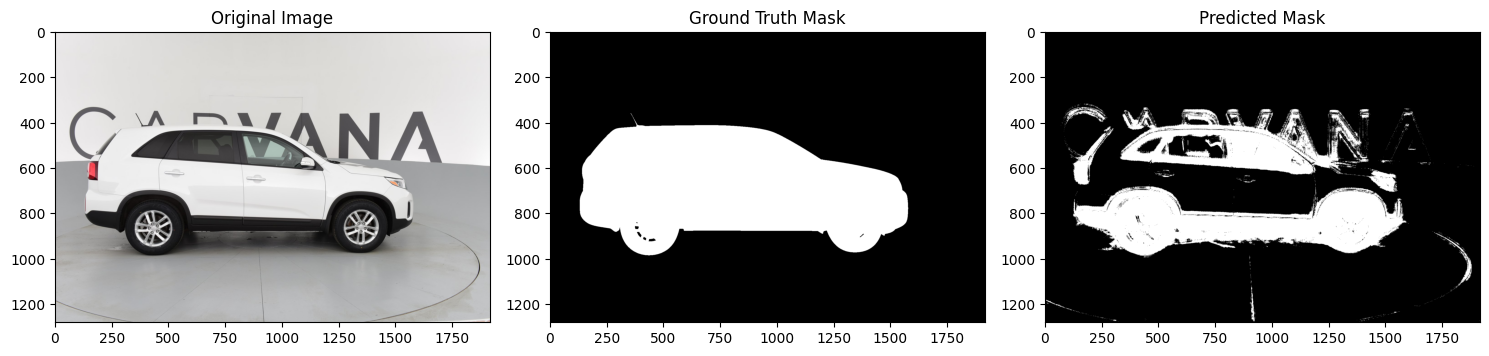

Validation round:  80%|████████████████████████████████████████████████████████████████▊                | 16/20 [00:21<00:05,  1.29s/batch]

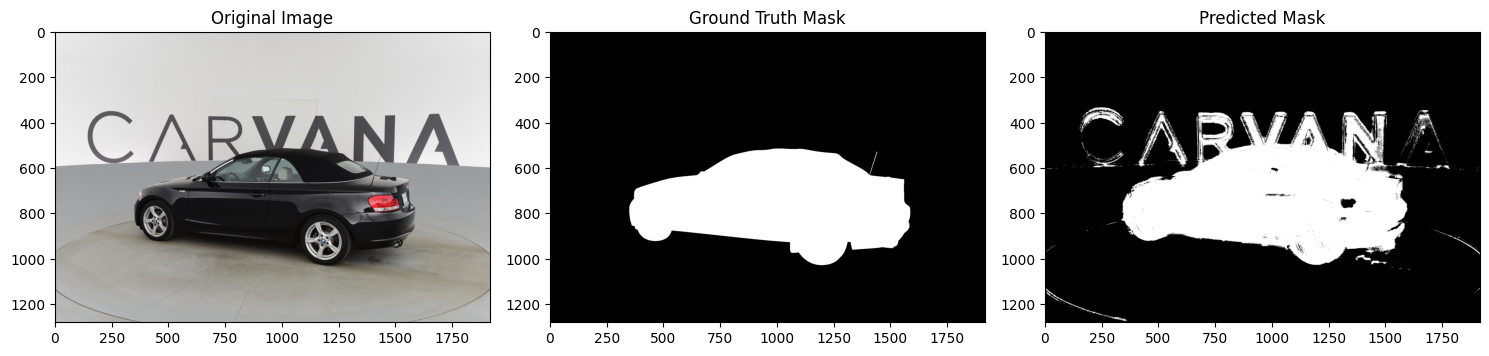

Validation round:  85%|████████████████████████████████████████████████████████████████████▊            | 17/20 [00:22<00:03,  1.29s/batch]

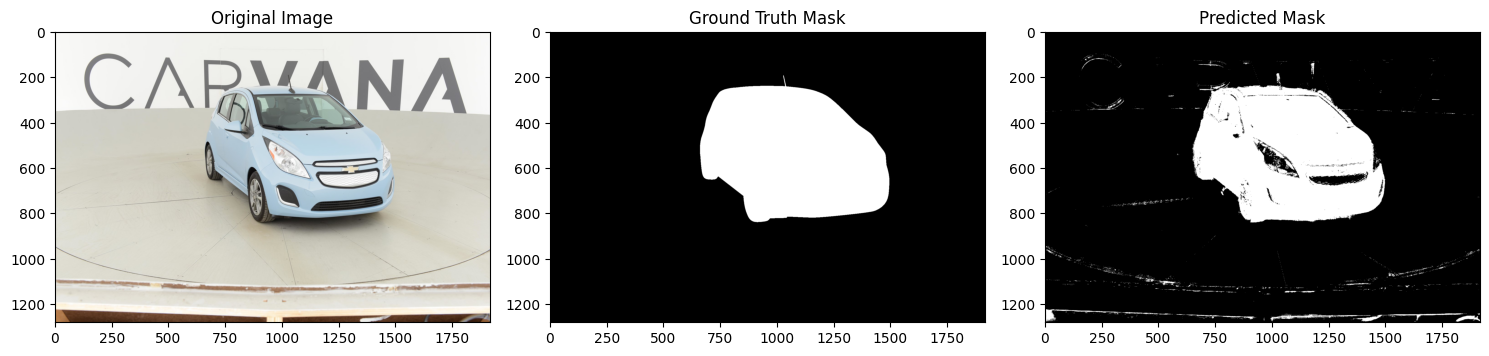

Validation round:  90%|████████████████████████████████████████████████████████████████████████▉        | 18/20 [00:24<00:02,  1.29s/batch]

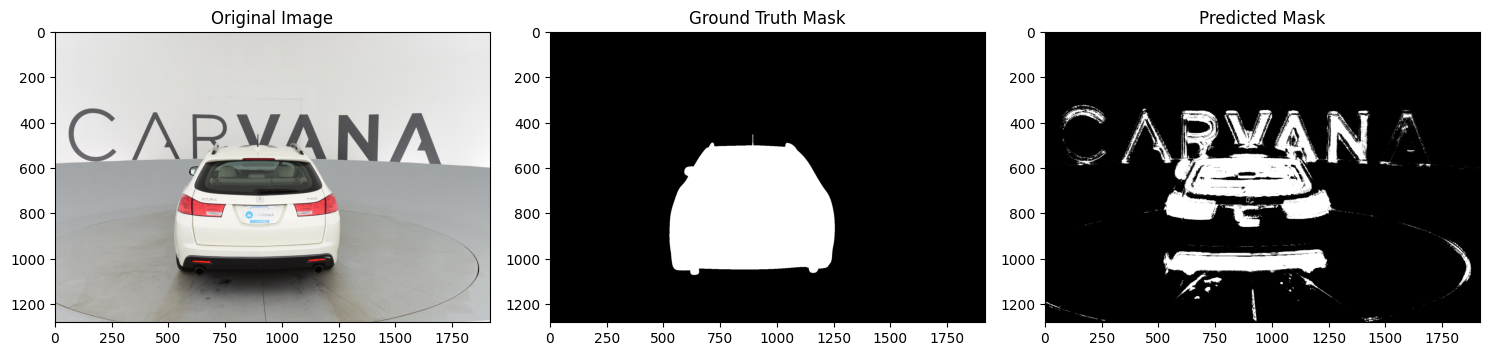

Validation round:  95%|████████████████████████████████████████████████████████████████████████████▉    | 19/20 [00:25<00:01,  1.32s/batch]

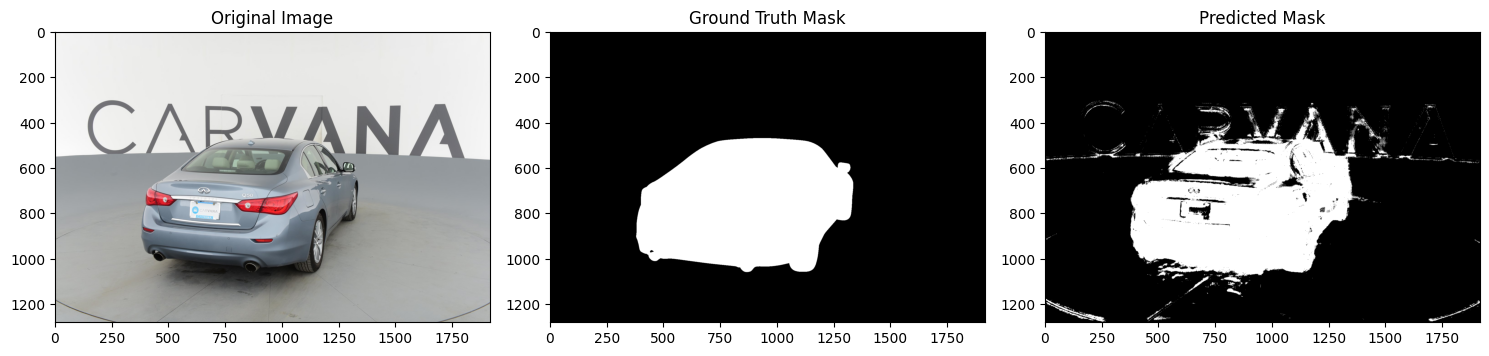

Validation Dice Score: 0.7764


In [28]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os
from pathlib import Path
from tqdm import tqdm
import numpy as np
from data_loading import CarvanaDataset, BasicDataset  # Ensure this file is in the correct directory
import models  # Ensure this file is in the correct directory
from dice_score import multiclass_dice_coeff, dice_coeff  # Ensure this file is in the correct directory

def plot_predictions(image, mask_true, mask_pred):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(image.permute(1, 2, 0).cpu().numpy())
    axes[0].set_title('Original Image')
    if mask_true.ndim == 2 or mask_true.shape[0] == 1:
        axes[1].imshow(mask_true.cpu().numpy().squeeze(), cmap='gray')
    else:
        axes[1].imshow(mask_true.argmax(0).cpu().numpy(), cmap='gray')
    axes[1].set_title('Ground Truth Mask')
    if mask_pred.ndim == 2 or mask_pred.shape[0] == 1:
        axes[2].imshow(mask_pred.cpu().numpy().squeeze(), cmap='gray')
    else:
        axes[2].imshow(mask_pred.argmax(0).cpu().numpy(), cmap='gray')
    axes[2].set_title('Predicted Mask')

    plt.tight_layout()
    plt.show()

@torch.no_grad()
def evaluate(net, dataloader, device):
    net.eval()
    num_val_batches = len(dataloader)
    dice_score = 0

    for batch_idx, batch in enumerate(tqdm(dataloader, total=num_val_batches, desc='Validation round', unit='batch', leave=False)):
        image, mask_true = batch['image'], batch['mask']

        image = image.to(device=device, dtype=torch.float32, memory_format=torch.channels_last)
        mask_true = mask_true.to(device=device, dtype=torch.long)

        mask_pred = net(image)

        if net.n_classes == 1:
            assert mask_true.min() >= 0 and mask_true.max() <= 1, 'True mask indices should be in [0, 1]'
            mask_pred = (F.sigmoid(mask_pred) > 0.5).float()
            dice_score += dice_coeff(mask_pred, mask_true, reduce_batch_first=False)
        else:
            assert mask_true.min() >= 0 and mask_true.max() < net.n_classes, 'True mask indices should be in [0, n_classes['
            mask_true = F.one_hot(mask_true, net.n_classes).permute(0, 3, 1, 2).float()
            mask_pred = F.one_hot(mask_pred.argmax(dim=1), net.n_classes).permute(0, 3, 1, 2).float()
            dice_score += multiclass_dice_coeff(mask_pred[:, 1:], mask_true[:, 1:], reduce_batch_first=False)

        plot_predictions(image[0], mask_true[0], mask_pred[0])

    net.train()
    return dice_score / max(num_val_batches, 1)


# Load the dataset
data_path = '../Data/CARVANA'
train_loader, val_loader = load_data(data_path)

# Load the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.UNet(n_channels=3, n_classes=2)
model.load_state_dict(torch.load("./output_unet/model_best.pth.tar")['state_dict'])
model.to(device)

# Evaluate the model
save_path = './output_unet/predictions'
os.makedirs(save_path, exist_ok=True)
dice_score = evaluate(model, val_loader, device)
print(f"Validation Dice Score: {dice_score:.4f}")


# Saving the pruned (only zeroed out) model

In [19]:
torch.save(pruned_model, './output_unet/unet_carvana_pruned_net.pth') # without .state_dict

# Let's test the accuracy of the pruned (only zeroed out) model

# Changing the architecture

In [31]:
!pip install torch-pruning
import torch_pruning as tp
    
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Conv2d): #Iterating over all the conv2d layers of the model
        channel_indices = [] #Stores indices of the channels to prune within this conv layer
        t = module.weight.clone().detach()
        t = t.reshape(t.shape[0], -1)
        z = torch.all(t == 0, dim=1)
        z = z.tolist()
        
        for i, flag in enumerate(z):
            if(flag):
                channel_indices.append(i)

        if(channel_indices == []):
            continue
        
        # 1. build dependency graph for vgg
        DG = tp.DependencyGraph().build_dependency(model, example_inputs=torch.randn(1,3,32,32).to(device))

        # 2. Specify the to-be-pruned channels. Here we prune those channels indexed by idxs.
        group = DG.get_pruning_group(module, tp.prune_conv_out_channels, idxs=channel_indices)
        #print(group)

        # 3. prune all grouped layers that are coupled with the conv layer (included).
        if DG.check_pruning_group(group): # avoid full pruning, i.e., channels=0.
            group.prune()
    
# 4. Save & Load
model.zero_grad() # We don't want to store gradient information
torch.save(model, './output_unet/unet_carvana_arch_pruned_net.pth') # without .state_dict



# Let's test the accuracy of the pruned model after the architecture modifications